<a href="https://colab.research.google.com/github/prasunamishra/AI.FinalClassRegs/blob/main/2552531_PrasunaMishraClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Income Classification**



#Adult Income Classification

(SDG 8 : Decent Work and Economic Growth)

#**1. Importing Libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector

##**2. Loading and Understanding the Dataset**

In [7]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/adult_classification.csv")

In [8]:
df.head(10) #First 10 rows of the dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df.tail(10) # Last 10 rows of the dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
df.info() # Basic Information about the dataset

#The non-null count's values are not correct here because the missing values are represented by "?" in the dataset, which will be replaced.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df.describe().transpose() # Basic ststistical information about the numeric columns

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [13]:
# Number of Rows and Columns
print('Number of Rows',df.shape[0])
print('Number of Columns',df.shape[1])

Number of Rows 32561
Number of Columns 15


##**3. Data Cleaning and Pre-processing**

**Handling Missing Values**

In [14]:
df.replace("?", np.nan, inplace=True) # Replacing "?" with NaN because missing values are represented by "?" in the dataset.
df.isna().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [15]:
df = df.dropna() # Removing rows with missing values
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [16]:
# Checking the structure of the dataset after removing the rows with missing values
df.shape

(30162, 15)

Handling Duplicate Values

In [17]:
df.duplicated().sum() # Checking for duplicate values

np.int64(23)

In [18]:
df = df.drop_duplicates( keep = 'first') # Removing duplicate values, keeping the first appearance
df.duplicated().sum()

np.int64(0)

In [19]:
# Checking the structure of the dataset after removing the rows with duplicate values
df.shape

(30139, 15)

In [20]:
df.describe(include = 'all').transpose() # A comprehensive summary of both numerical and categorical variables after cleaning

# Here: NaN values appear where a particular statistic does not apply to the data type, rather than due to missing values.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,30139.0,NaN,NaN,NaN,38.44172,13.131426,17.0,28.0,37.0,47.0,90.0
workclass,30139,7,Private,22264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,30139.0,NaN,NaN,NaN,189795.02598,105658.624341,13769.0,117627.5,178417.0,237604.5,1484705.0
education,30139,16,HS-grad,9834,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education.num,30139.0,NaN,NaN,NaN,10.122532,2.548738,1.0,9.0,10.0,13.0,16.0
marital.status,30139,7,Married-civ-spouse,14059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,30139,14,Prof-specialty,4034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,30139,6,Husband,12457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,30139,5,White,25912,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,30139,2,Male,20366,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###**Dropping Unnecessary Columns**

In [21]:
df.drop('fnlwgt', axis=1, inplace=True)

As described on Kaggle, fnlwgt (final weight) represents the number of individuals in the U.S. population that a particular census record corresponds to. It is a survey sampling weight calculated by the U.S. Census Bureau using population controls such as state, age, sex, race, and Hispanic origin, ensuring that the sampled data accurately reflects the overall population distribution.

However, it is dropped here, because including it as a feature may introduce sampling bias, and it does not contribute meaningful predictive information for income classification.

###**Data Conversion**

In [22]:
# Mapping the values in the "income" column to 0s and 1s.

df['income']=df['income'].map({"<=50K":0,">50K":1})
df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


#**4. Exploratory Data Analysis(EDA)**

**Correlation Heatmap**

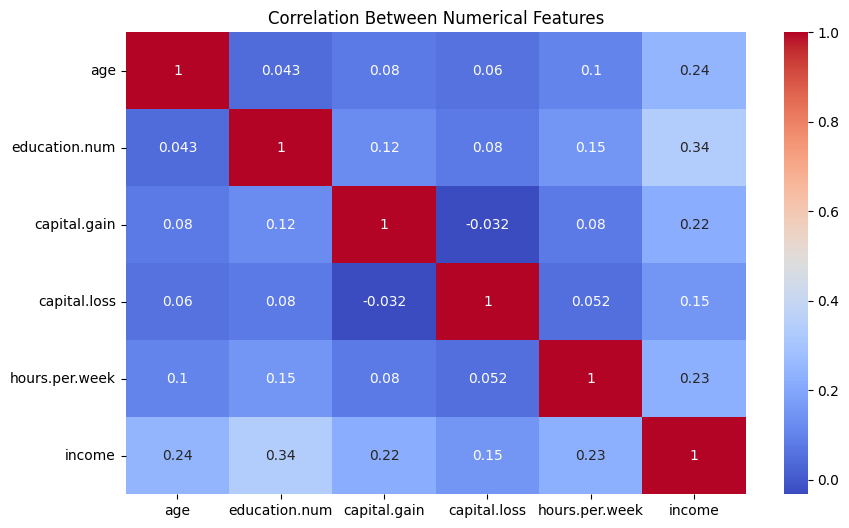

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()

# Placed after data mapping to study correlation with the target variable (income).

The features are positively correlated with the target variable. Education level is the strongest correlation with income, followed by age, working hours, and capital gains. All numerical features show weak to moderate correlations, indicating that income is influenced by multiple factors rather than a single dominant variable.

###**Income Class Distribution Analysis**

In [24]:
df['income'].value_counts(normalize=True)

,proportion
income,
0,0.750954
1,0.249046


The target variable shows class imbalance, with approximately 75% of instances belonging to the ≤50K class.

This imbalance should be taken into account during model training and evaluation.

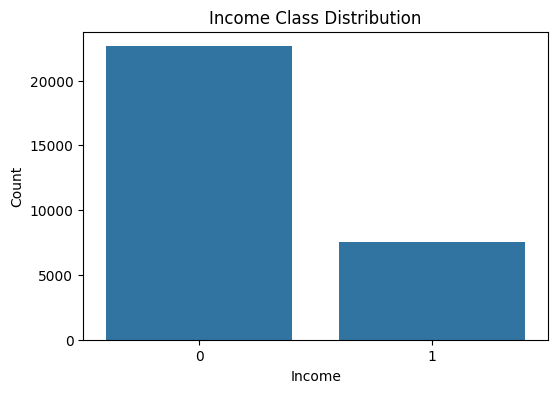

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x="income", data=df)
plt.title("Income Class Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

**Age vs Income Analysis**

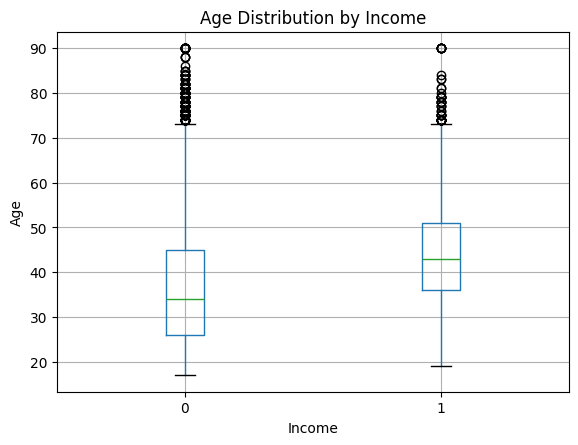

In [26]:
df.boxplot(column="age", by="income")
plt.title("Age Distribution by Income")
plt.suptitle("")
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

Individuals earning more than 50K tend to be older on average, although there is noticeable overlap between the two income groups, which suggests that age alone is not sufficient for classification. Also, there are noticable outliers, and the box plot is slightly skewed to the right (Positively skewed).

**Working Hours vs Income Analysis**

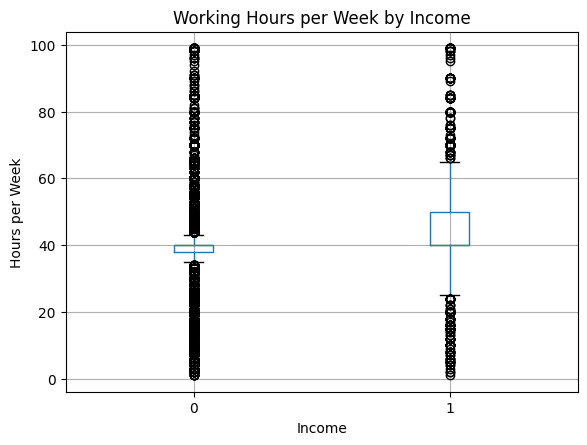

In [27]:
df.boxplot(column="hours.per.week", by="income")
plt.title("Working Hours per Week by Income")
plt.suptitle("")
plt.xlabel("Income")
plt.ylabel("Hours per Week")
plt.show()

Individuals earning more than 50K tend to work slightly longer hours per week, while lower-income earners are more concentrated around 40-hour workweeks. However, the median for both classes seems to be close to 40 hours. The data seem pretty clustered for the class earning <=50K, whereas more variability is seen in the class earning >50K.

**Work Class vs Income Analysis**

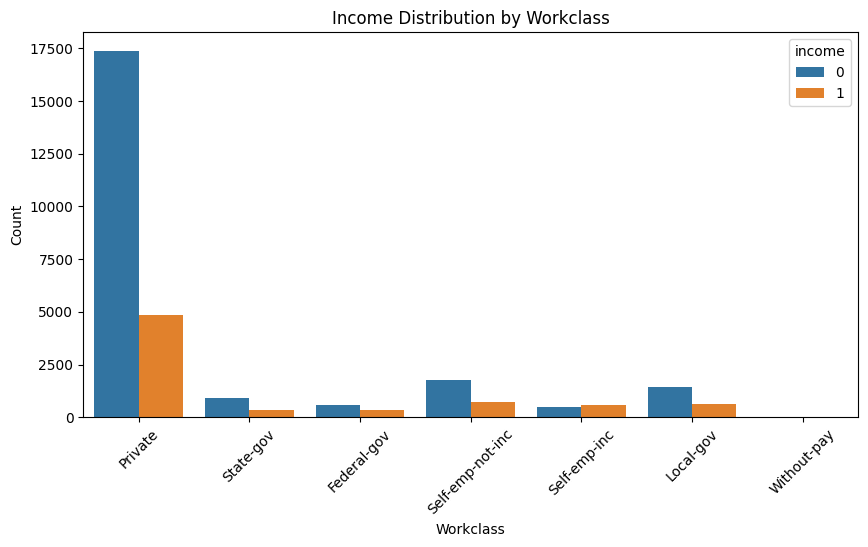

In [28]:
plt.figure(figsize = (10,5))
sns.countplot(x = "workclass", hue = "income", data=df)
plt.title("Income Distribution by Workclass")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Private-sector workers dominate the dataset but mostly earn 50K or less, while incorporated self-employed(self-emp-inc) individuals are far more likely to earn above 50K. Rest of the workclasses, most of the indivuduals earn =<50K.

**Education vs Income Analysis**

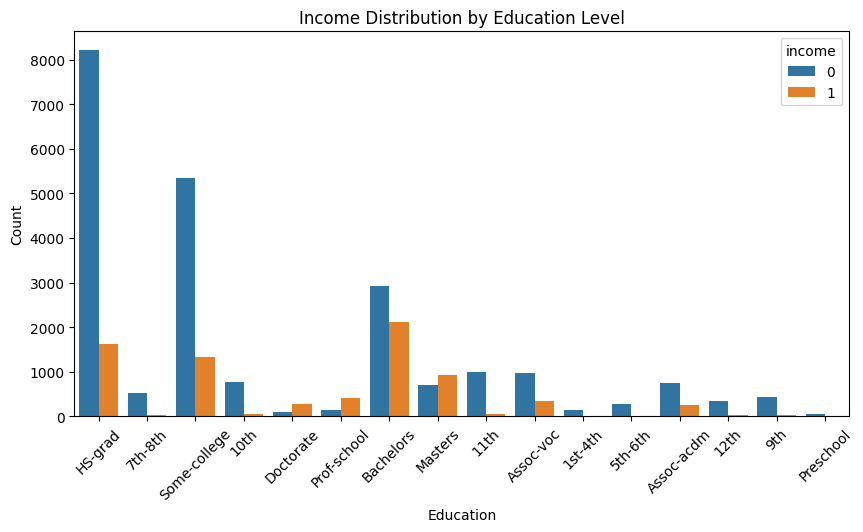

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x="education", hue="income", data=df)
plt.title("Income Distribution by Education Level")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Income increases with education level. Individuals with lower education are predominantly in the ≤50K income group, while higher education, especially Bachelor’s degree and above, is strongly associated with a greater likelihood of earning more than 50K. Thus, education can be considered important factor for earning.

**Marital Status vs Income Analysis**

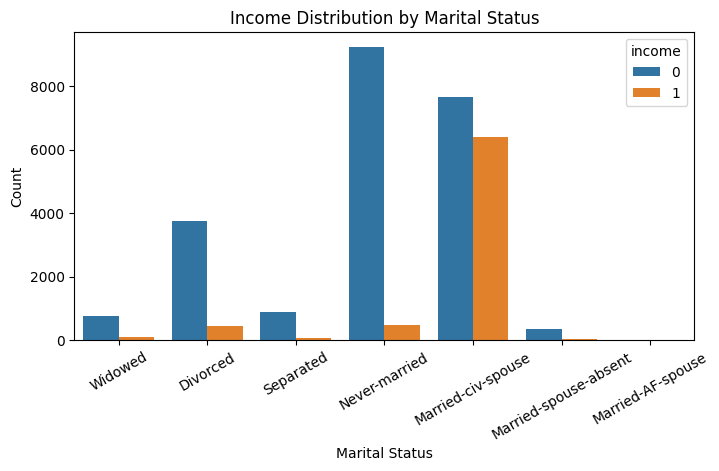

In [30]:
plt.figure(figsize=(8,4))
sns.countplot(x="marital.status", hue="income", data=df)
plt.title("Income Distribution by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

Individuals who are married and living with their spouse are far more likely to earn above 50K, while never-married, divorced, separated, and widowed individuals predominantly earn 50K or less. Thus, marital status can be strongly associated with income.

**Sex vs Income Analysis**

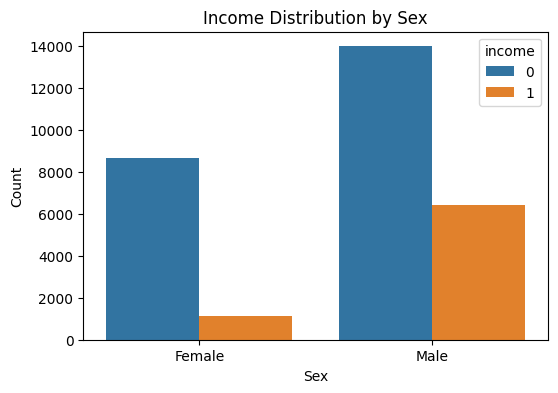

In [31]:
plt.figure(figsize = (6,4))
sns.countplot(x="sex", hue="income", data=df)
plt.title("Income Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

A significantly larger number of males earn more than 50K. Female counts in the >50K category are very low compared to males. Similarly, males outnumber females in the ≤50K group and especially in the >50K group. However, the gap is much wider at higher income levels, suggesting income inequality by sex.

**Race vs Income Analysis**

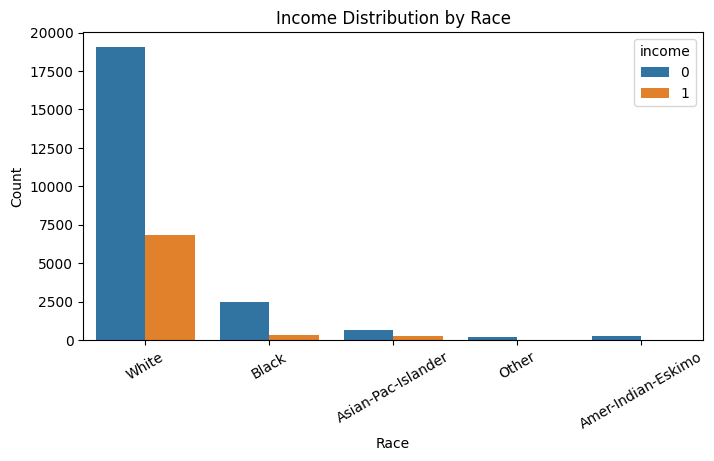

In [32]:
plt.figure(figsize=(8,4))
sns.countplot(x="race", hue="income", data=df)
plt.title("Income Distribution by Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

For every race, <=50K income is more common than >50K. This confirms that most individuals earn ≤50K, regardless of race. The highest number of people earning >50K are White. Although the total number of Asian-Pac-Islanders is small, a higher proportion of Asian-Pac-Islanders earn >50K relative to other minority groups. Black individuals are concentrated more in the ≤50K category, with few earning >50K. And, there is very small representation for groups like “Other” and “Amer-Indian-Eskimo” in the dataset.  

#**5. Feature Engineering**

Dropping the "education" column here to avoid confusion in EDA. The column is not necessary because its values have been mapped in the original dataset in a new column, namely "education.num".

In [33]:
df.drop('education', axis=1, inplace=True)
df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


**Separating Feature and Target Varialble**

In [34]:
X = df.drop('income', axis=1)
y = df['income']

###**Encoding Categorical Features**

In [35]:
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(exclude="object").columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country'],
      dtype='object')
Numerical Columns: Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')


In [36]:
# Applying One-hot encoding to categorical variables to transform them into a numerical format without imposing ordinal relationships
X_encoded = pd.get_dummies(X, drop_first=True)

In [37]:
X_encoded.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,9,0,4356,18,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,54,4,0,3900,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,41,10,0,3900,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,9,0,3770,45,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,38,6,0,3770,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# **6. PREPROCESSING**

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

**Train-Test Split**

In [39]:
# Dividing the dataset into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#**7. Neural Network-Based Classification Model (MLP)**

**Model Train**

In [40]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    max_iter=300,
    random_state=42
)

mlp.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

Input Layer: Number of neurons = number of features

Hidden Layer 1: 64 neurons, ReLU activation

Hidden Layer 2: 32 neurons, ReLU activation

Output Layer: 1 neuron (binary classification)

Activation Function: ReLU

Loss Function: Log Loss (Binary Cross-Entropy)

Optimizer: Adam

Regularization: L2 (to reduce overfitting)

Max Iterations: 300



**Model Prediction**

In [41]:
y_train_pred_mlp = mlp.predict(X_train)
y_test_pred_mlp = mlp.predict(X_test)

**Model Evaluation**

In [42]:
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

In [43]:
mlp_train_metrics = evaluate_model(y_train, y_train_pred_mlp)
mlp_test_metrics = evaluate_model(y_test, y_test_pred_mlp)

mlp_train_metrics, mlp_test_metrics

({'Accuracy': 0.9077184687487039,
  'Precision': 0.8502594514455152,
  'Recall': 0.7640299750208159,
  'F1-Score': 0.8048416805543374},
 {'Accuracy': 0.8327803583278036,
  'Precision': 0.67823571945047,
  'Recall': 0.6249167221852099,
  'F1-Score': 0.6504854368932039})

In [44]:
print(classification_report(y_test, y_test_pred_mlp))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4527
           1       0.68      0.62      0.65      1501

    accuracy                           0.83      6028
   macro avg       0.78      0.76      0.77      6028
weighted avg       0.83      0.83      0.83      6028



# **8. Building Primary Models**

##**Logistic Regression**

**Model Train**

In [45]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

**Model Prediction**

In [46]:
y_train_pred_lr = log_reg.predict(X_train)
y_test_pred_lr = log_reg.predict(X_test)

**Model Evaluation**

In [47]:
lr_train_metrics = evaluate_model(y_train, y_train_pred_lr)
lr_test_metrics = evaluate_model(y_test, y_test_pred_lr)

lr_train_metrics, lr_test_metrics

({'Accuracy': 0.8472896188461698,
  'Precision': 0.7331861072073881,
  'Recall': 0.6081598667776853,
  'F1-Score': 0.6648461678499908},
 {'Accuracy': 0.8528533510285335,
  'Precision': 0.7467845659163987,
  'Recall': 0.6189207195203198,
  'F1-Score': 0.6768670309653916})

In [48]:
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4527
           1       0.75      0.62      0.68      1501

    accuracy                           0.85      6028
   macro avg       0.81      0.77      0.79      6028
weighted avg       0.85      0.85      0.85      6028



##**Decision Tree Classifier**

**Model Train**

In [49]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Model Prediction**

In [50]:
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

**Model Evaluation**

In [51]:
dt_train_metrics = evaluate_model(y_train, y_train_pred_dt)
dt_test_metrics = evaluate_model(y_test, y_test_pred_dt)

dt_train_metrics, dt_test_metrics

({'Accuracy': 0.9776865331176642,
  'Precision': 0.98647446164798,
  'Recall': 0.9230641132389675,
  'F1-Score': 0.9537164487267722},
 {'Accuracy': 0.8183477106834771,
  'Precision': 0.6328534031413613,
  'Recall': 0.6442371752165224,
  'F1-Score': 0.6384945526576428})

In [52]:
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4527
           1       0.63      0.64      0.64      1501

    accuracy                           0.82      6028
   macro avg       0.76      0.76      0.76      6028
weighted avg       0.82      0.82      0.82      6028



##**Initial Model Comparison (Before Tuning)**

In [53]:
nn_comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Neural Network (MLP)"],
    "Test Accuracy": [
        lr_test_metrics["Accuracy"],
        dt_test_metrics["Accuracy"],
        mlp_test_metrics["Accuracy"]
    ],
    "Test Precision": [
        lr_test_metrics["Precision"],
        dt_test_metrics["Precision"],
        mlp_test_metrics["Precision"]
    ],
    "Test Recall": [
        lr_test_metrics["Recall"],
        dt_test_metrics["Recall"],
        mlp_test_metrics["Recall"]
    ],
    "Test F1-Score": [
        lr_test_metrics["F1-Score"],
        dt_test_metrics["F1-Score"],
        mlp_test_metrics["F1-Score"]
    ]
})

nn_comparison_df

,Model,Test Accuracy,Test Precision,Test Recall,Test F1-Score
0,Logistic Regression,0.852853,0.746785,0.618921,0.676867
1,Decision Tree,0.818348,0.632853,0.644237,0.638495
2,Neural Network (MLP),0.832780,0.678236,0.624917,0.650485


Among the classical models, the Decision Tree achieved higher training performance, while Logistic Regression demonstrated better generalization on unseen data. In the case of neural network, its performance gains over classical models were marginal, indicating that the dataset’s structure may already be well captured by classical models.

##**9. Hyperparameter Optimization with Cross-Validation**

**Logistic Regression (GridSearchCV)**

In [54]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

In [55]:
grid_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid_lr,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='f1')

**Results**

In [56]:
grid_lr.best_params_, grid_lr.best_score_

({'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'},
 np.float64(0.6616110841730517))

#**Decision Tree (GridSearchCV)**

In [57]:
dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [58]:
grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='f1')

In [59]:
grid_dt.best_params_, grid_dt.best_score_

({'criterion': 'entropy',
  'max_depth': 20,
  'min_samples_leaf': 10,
  'min_samples_split': 2},
 np.float64(0.6698308076210819))

###**Cross-Validation Results**

In [60]:
cv_results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Best CV F1-Score": [
        grid_lr.best_score_,
        grid_dt.best_score_
    ],
    "Best Parameters": [
        grid_lr.best_params_,
        grid_dt.best_params_
    ]
})

cv_results_df

,Model,Best CV F1-Score,Best Parameters
0,Logistic Regression,0.661611,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline..."
1,Decision Tree,0.669831,"{'criterion': 'entropy', 'max_depth': 20, 'min..."


Hyperparameter optimization was performed using GridSearchCV with 5-fold cross-validation. For Logistic Regression, regularization strength was tuned to balance bias and variance.

For the Decision Tree, depth and sample constraints were optimized to reduce overfitting. Cross-validation results showed marginal improvement and performance for both models.

##**10. Feature Selection**

#**Logistic Regression (Forward Selection)**

In [61]:
# Applying Forward Selection

lr_for_fs = LogisticRegression(max_iter=1000, random_state=42)

sfs_lr = SequentialFeatureSelector(
    estimator=lr_for_fs,
    n_features_to_select=15,
    direction='forward',
    scoring='f1',
    cv=5,
    n_jobs=-1
)

sfs_lr.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000,
                                                       random_state=42),
                          n_features_to_select=15, n_jobs=-1, scoring='f1')

In [62]:
# Extracting Selected Features

selected_mask_lr = sfs_lr.get_support()
selected_features_lr = X_encoded.columns[selected_mask_lr]

len(selected_features_lr), list(selected_features_lr)

(15,
 ['education.num',
  'capital.gain',
  'capital.loss',
  'marital.status_Married-AF-spouse',
  'marital.status_Married-civ-spouse',
  'occupation_Exec-managerial',
  'occupation_Prof-specialty',
  'occupation_Tech-support',
  'occupation_Transport-moving',
  'relationship_Other-relative',
  'relationship_Own-child',
  'race_Other',
  'native.country_Canada',
  'native.country_Germany',
  'native.country_Jamaica'])

In [63]:
# Reducing the Dataset for Re-building the Logistic Regression Model

X_train_lr_selected = X_train[:, selected_mask_lr]
X_test_lr_selected = X_test[:, selected_mask_lr]

#**Decision Tree (Forward Selection)**

In [64]:
# Applying Forward Selection

dt_for_fs = DecisionTreeClassifier(random_state=42)

sfs_dt = SequentialFeatureSelector(
    estimator=dt_for_fs,
    n_features_to_select=15,   # keeping same number for fair comparison
    direction='forward',
    scoring='f1',
    cv=5,
    n_jobs=-1
)

sfs_dt.fit(X_train, y_train)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(random_state=42),
                          n_features_to_select=15, n_jobs=-1, scoring='f1')

In [65]:
# Extracting Selected Features

selected_mask_dt = sfs_dt.get_support()
selected_features_dt = X_encoded.columns[selected_mask_dt]

len(selected_features_dt), list(selected_features_dt)

(15,
 ['education.num',
  'capital.gain',
  'capital.loss',
  'marital.status_Married-civ-spouse',
  'marital.status_Separated',
  'occupation_Exec-managerial',
  'occupation_Prof-specialty',
  'occupation_Tech-support',
  'relationship_Other-relative',
  'race_White',
  'native.country_England',
  'native.country_Haiti',
  'native.country_Hungary',
  'native.country_India',
  'native.country_South'])

In [66]:
# Reducing the Dataset for Re-building the Decision Tree Model

X_train_dt_selected = X_train[:, selected_mask_dt]
X_test_dt_selected = X_test[:, selected_mask_dt]

Wrapper-based feature selection was performed separately for Logistic Regression and Decision Tree models using **Sequential Forward Selection**. This method iteratively added features that improved cross-validated F1-score for each model.

Since different learning algorithms benefit from different feature subsets, applying feature selection independently allowed each model to use an optimized feature set, leading to improved performance.

#**11. Final Models and Comparative Analysis**

In [67]:
# Re-creating best estimators from GridSearch
best_lr = grid_lr.best_estimator_
best_dt = grid_dt.best_estimator_

#**Logistic Regression Final**

In [68]:
# Training final Logistic Regression with selected features
best_lr.fit(X_train_lr_selected, y_train)

# Predicting on test set
y_test_pred_lr_final = best_lr.predict(X_test_lr_selected)

# Final metrics
lr_final_metrics = evaluate_model(y_test, y_test_pred_lr_final)

lr_final_metrics

{'Accuracy': 0.8485401459854015,
 'Precision': 0.7325949367088608,
 'Recall': 0.6169220519653564,
 'F1-Score': 0.6698010849909584}

#**Decision Tree Final**

In [69]:
# Training final Decision Tree with selected features
best_dt.fit(X_train_dt_selected, y_train)

# Predicting on test set
y_test_pred_dt_final = best_dt.predict(X_test_dt_selected)

# Final metrics
dt_final_metrics = evaluate_model(y_test, y_test_pred_dt_final)

dt_final_metrics

{'Accuracy': 0.8588254810882548,
 'Precision': 0.773109243697479,
 'Recall': 0.6129247168554297,
 'F1-Score': 0.6837606837606838}

###**Comparative Analysis**

In [70]:
final_comparison_table = pd.DataFrame({
    "Model": ["Logistic Regression (Final)", "Decision Tree (Final)"],
    "Features Used": [len(selected_features_lr), len(selected_features_dt)],
    "CV Score (F1)": [grid_lr.best_score_, grid_dt.best_score_],
    "Accuracy": [lr_final_metrics["Accuracy"], dt_final_metrics["Accuracy"]],
    "Precision": [lr_final_metrics["Precision"], dt_final_metrics["Precision"]],
    "Recall": [lr_final_metrics["Recall"], dt_final_metrics["Recall"]],
    "F1-Score": [lr_final_metrics["F1-Score"], dt_final_metrics["F1-Score"]],
})

final_comparison_table

,Model,Features Used,CV Score (F1),Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Final),15,0.661611,0.848540,0.732595,0.616922,0.669801
1,Decision Tree (Final),15,0.669831,0.858825,0.773109,0.612925,0.683761


The final models were rebuilt using optimal hyperparameters obtained through cross-validation and feature subsets selected using wrapper-based forward selection. The Logistic Regression model used a smaller, linearly informative feature subset, while the Decision Tree leveraged a different subset capturing non-linear interactions. The comparative results indicate that the ***Decision Tree*** achieved superior results on the test set, as reflected by higher F1-score and balanced precision–recall performance.